In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data.csv")
df.head()

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


<Figure size 1000x800 with 0 Axes>

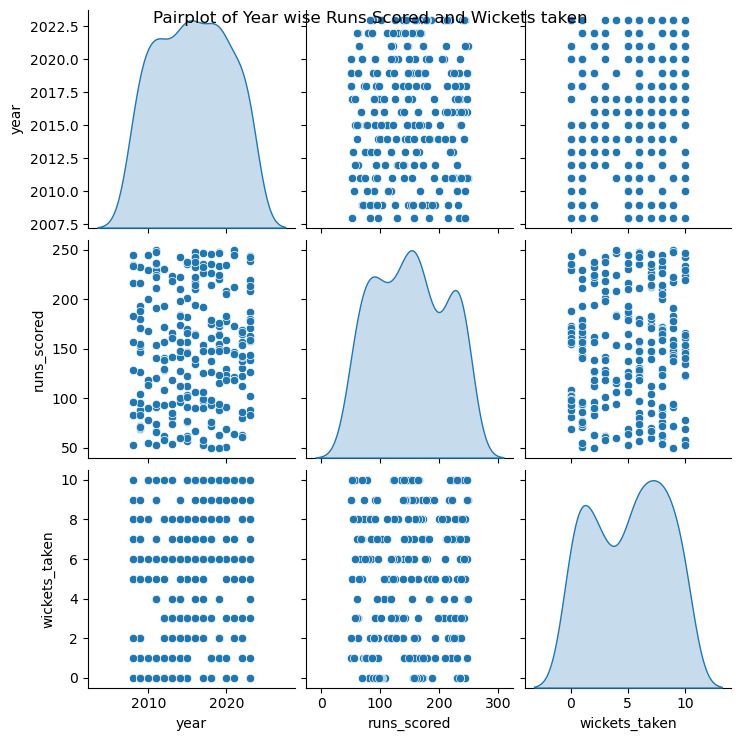

In [3]:
plt.figure(figsize=(10,8))
sns.pairplot(df[["year","runs_scored","wickets_taken"]],diag_kind="kde")
plt.suptitle("Pairplot of Year wise Runs Scored and Wickets taken")
plt.show()

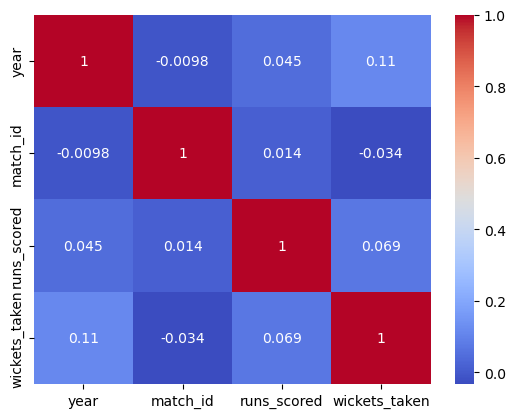

In [4]:
#Pearson correlation 
cols=df.select_dtypes("int").columns
df[cols].corr()
sns.heatmap(df[cols].corr(),annot=True,cmap="coolwarm")
plt.show()

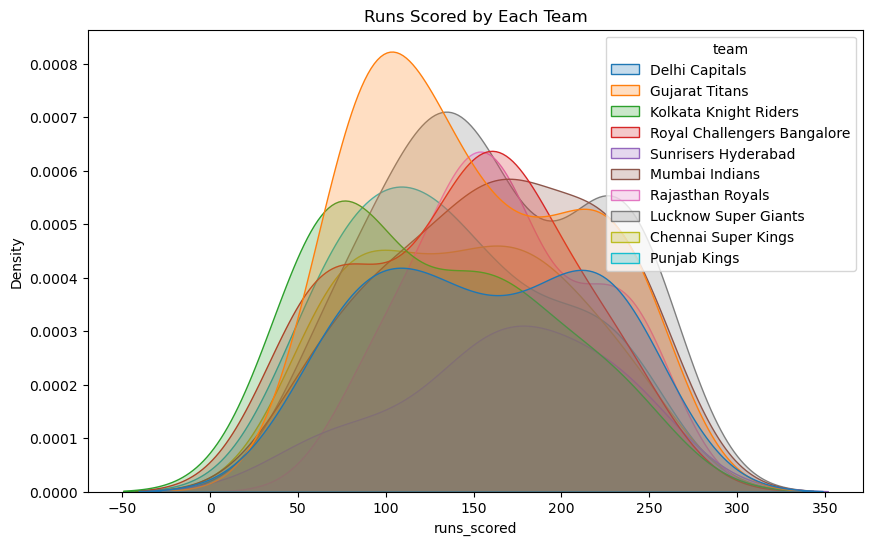

In [5]:
#kde map
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x="runs_scored",hue="team",fill=True)
plt.title("Runs Scored by Each Team")
plt.show()
# kd plot visualises the densitydistribution of runs scored for each team. The overlapping densities allows a comparison of scoring pattern across team.
# A team with broader or higher peak suggest consistancy or dominane in scorring  whereas inconsistant peaks give a hint of varying perforamnce

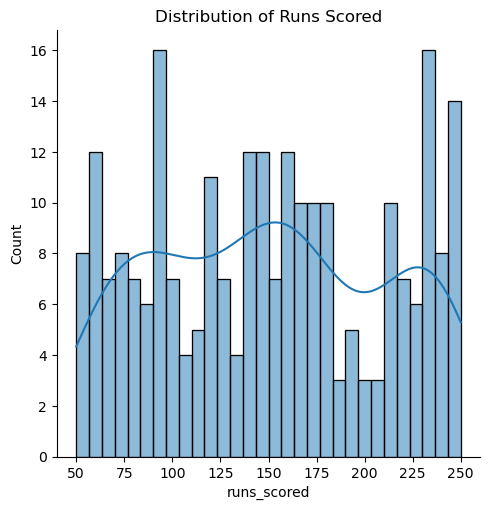

In [6]:
#displot -- distribution plot
sns.displot(data=df,x="runs_scored",kde=True,bins=30)
plt.title("Distribution of Runs Scored")
plt.show()
#insights : THis reveals the common scoring range in most of the matches is 150 to 180. The kd here smoothens the histogram and makes it easier to observe 
#trends . The long  tail on the right indicaes occational very high score. i.e. above 220 which is rare and highlight exceptional batting performance .
#

<Axes: xlabel='runs_scored', ylabel='wickets_taken'>

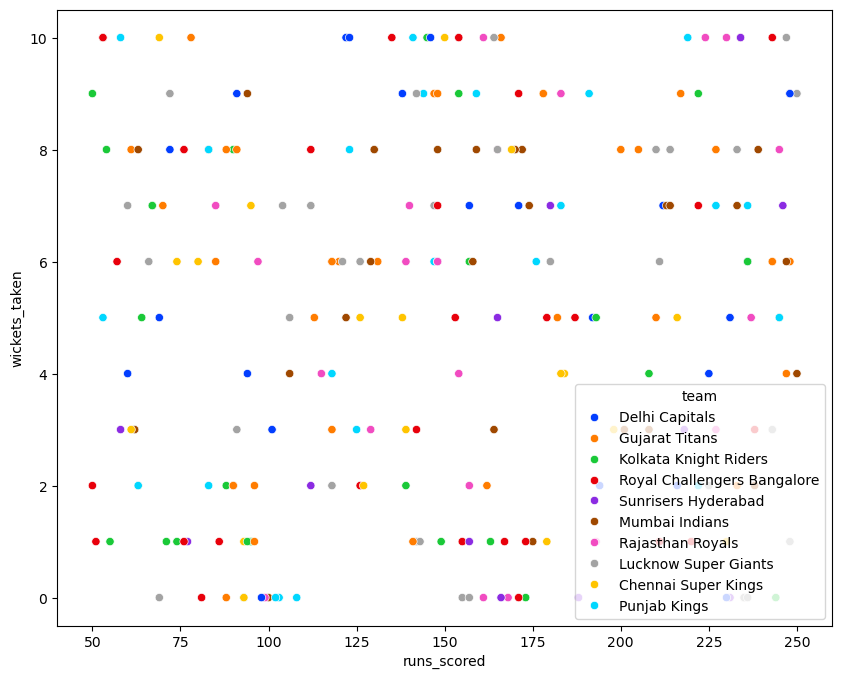

In [7]:
#scatterplot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="runs_scored",y="wickets_taken",palette="bright",hue="team")

In [8]:
df.head()

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


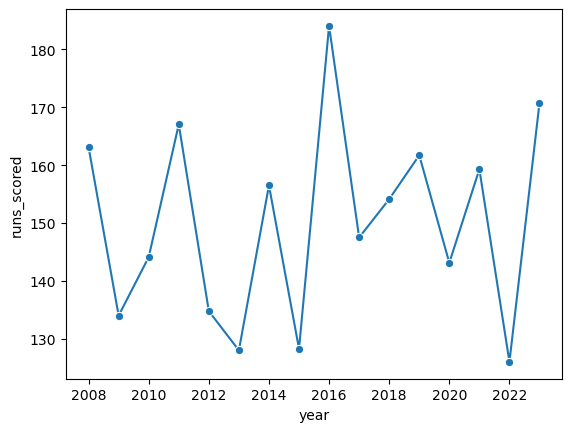

In [11]:
#lineplot (average by years)


x=df.groupby("year")["runs_scored"].mean()
sns.lineplot(x,marker="o")
plt.show()
#the line plot shows have average runs scred have changed over the years. It helps identify upward or downward trend indicating shift in the nature 
# of the IPL that is more aggressive batting over time, better pitches, etc.

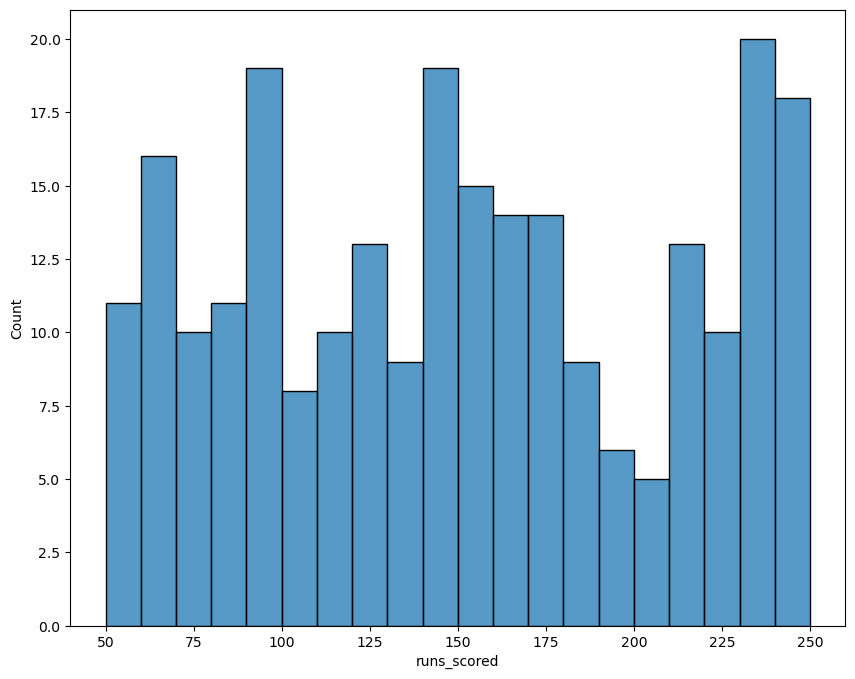

In [13]:
#histogram plot

plt.figure(figsize=(10,8))
sns.histplot(data=df,x="runs_scored", bins=20)
plt.title("Histogram of Runs Scored")
plt.show()
# Histogram displays the frequency of runs scored within the specific range it is useful for identifying the most common scores in the IPL matches
#This plot reconfirms that most of the scores falls between 125-175 consistant with other IPL matches. 
# Peak at the interval 150 sugggest score cluster likely due to team strategy.  

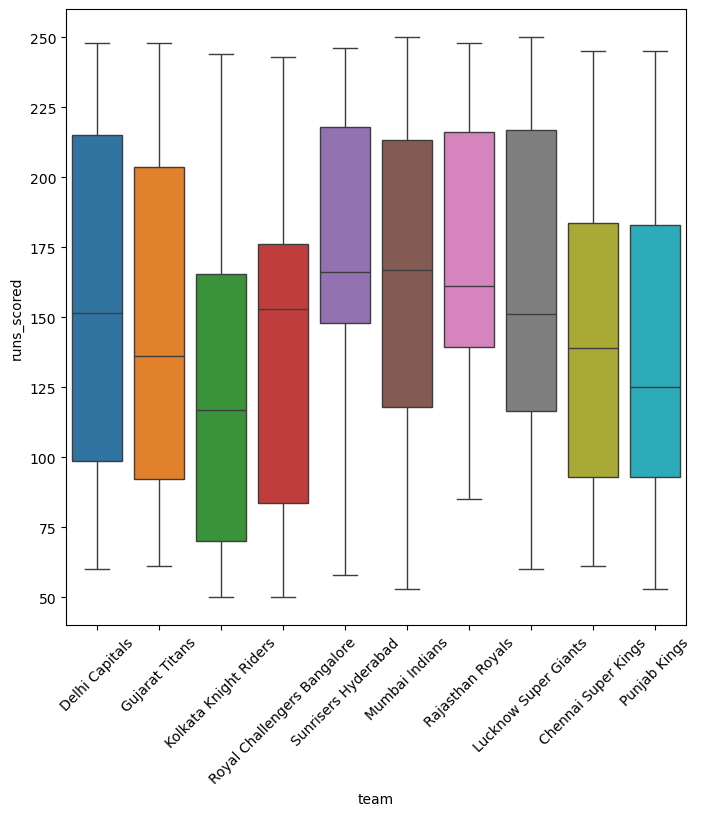

In [15]:
#boxplot

plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="team",y="runs_scored",hue="team")
plt.xticks(rotation=45)
plt.show()

#boxplot provide information about median variability ans outlyers. THye hsows interportile ranges upper and lower whiskers team with many outlyers
#show varied performance whereas team which have higher medians and smaller interquartile range indicate consistancy in their batting strategy.
#

<Figure size 1000x600 with 0 Axes>

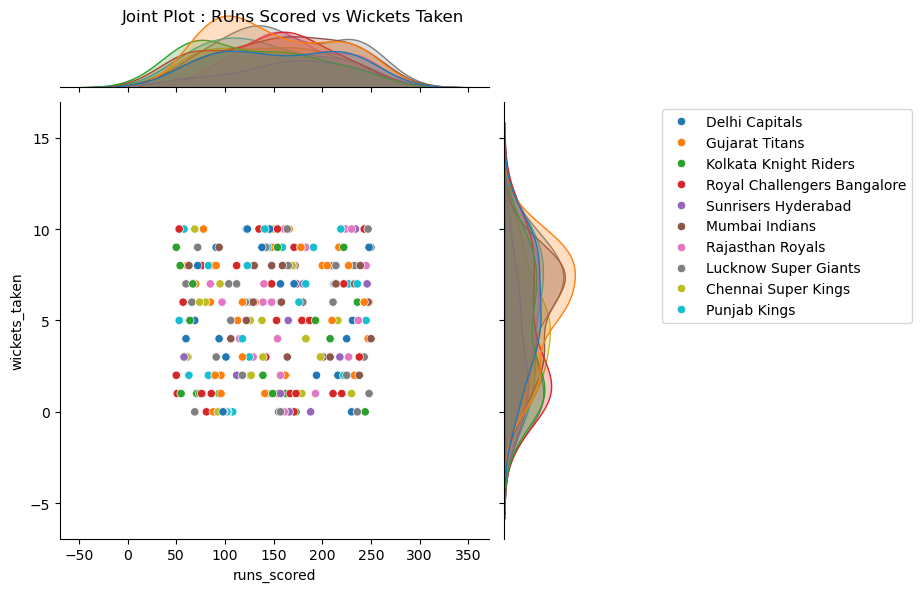

In [22]:
#jointplot
plt.figure(figsize=(10,6))
sns.jointplot(data=df, x="runs_scored", y="wickets_taken",hue="team",kind="scatter",color="purple")
plt.legend(bbox_to_anchor=(2,1),loc="upper right") #bbox_to_anchor is used to position the legend(x angd y position)
plt.suptitle("Joint Plot : RUns Scored vs Wickets Taken")
plt.show()


#Joint plot combines scatter plot in the central area with histogram or density plots alot the margin to show the individual performance and disctribution 
#of each variable. The central scatterplot shows the relationship between runs scored and wickets taken generally it is expected that 
#more wickets taken results in lesser runs score i.e a negative co-relation but the scatter plot here is shwoing there is no such co-relation
#between wickets and runs scored. .

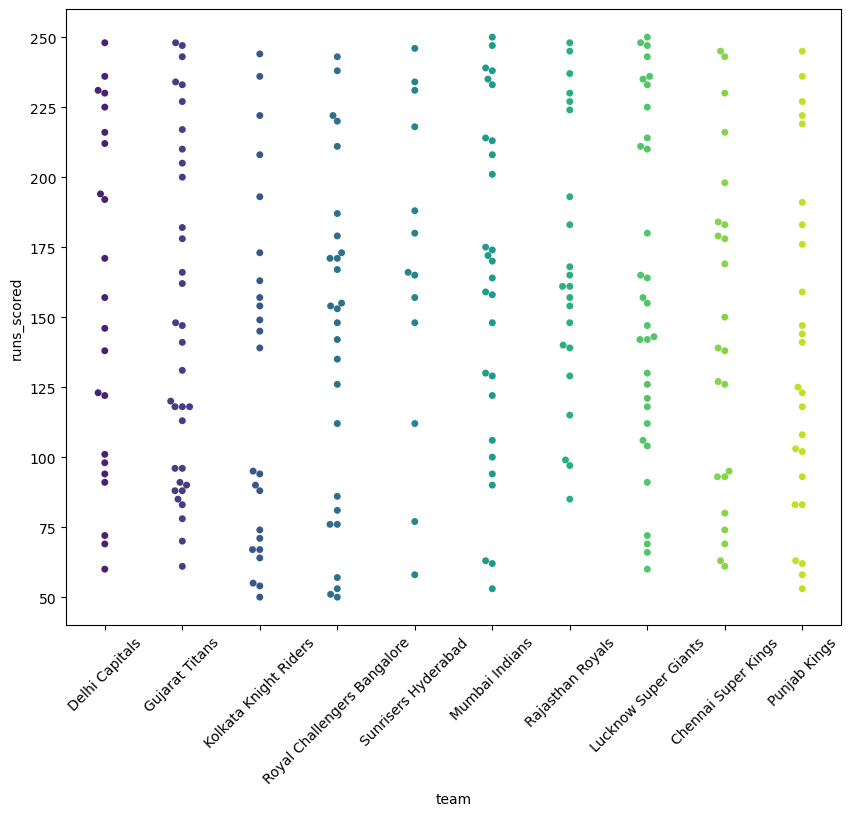

In [24]:
#swarm plot

plt.figure(figsize=(10,8))
sns.swarmplot(data=df,x="team",y="runs_scored",palette="viridis",hue="team")
plt.xticks(rotation=45)
plt.show()

#swarmplot displays each data point as a point as a point on the graph where the points represent values of the categorical variable and their position 
#represent corresponding numerical value. THey are particularly useful when you want to see how the distribution of data point change accros
#different categories

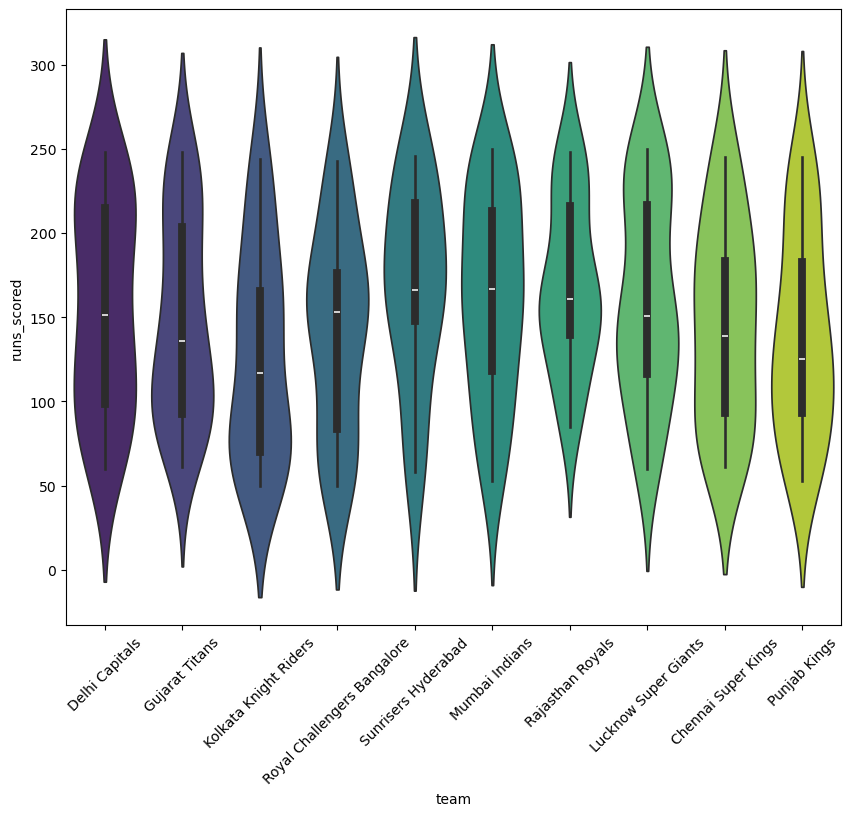

In [25]:
#swarm plot

plt.figure(figsize=(10,8))
sns.violinplot(data=df,x="team",y="runs_scored",palette="viridis",hue="team")
plt.xticks(rotation=45)
plt.show()
#violin plot combines kde and boxplot to visualize runs score distribution. It offer a richer view of scoring trends accross teams highlighting 
# both density and vriability. It is similar to boxplot but also add the density perspective. 

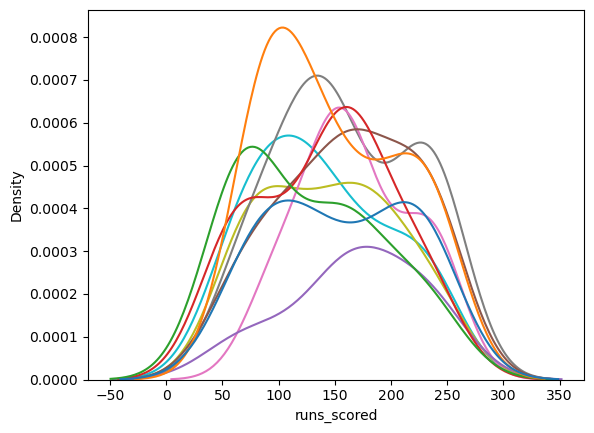

In [28]:
#kde plot

sns.kdeplot(data=df,x="runs_scored", hue="team",legend=False)#fill=True
plt.show()

<Figure size 4000x2000 with 0 Axes>

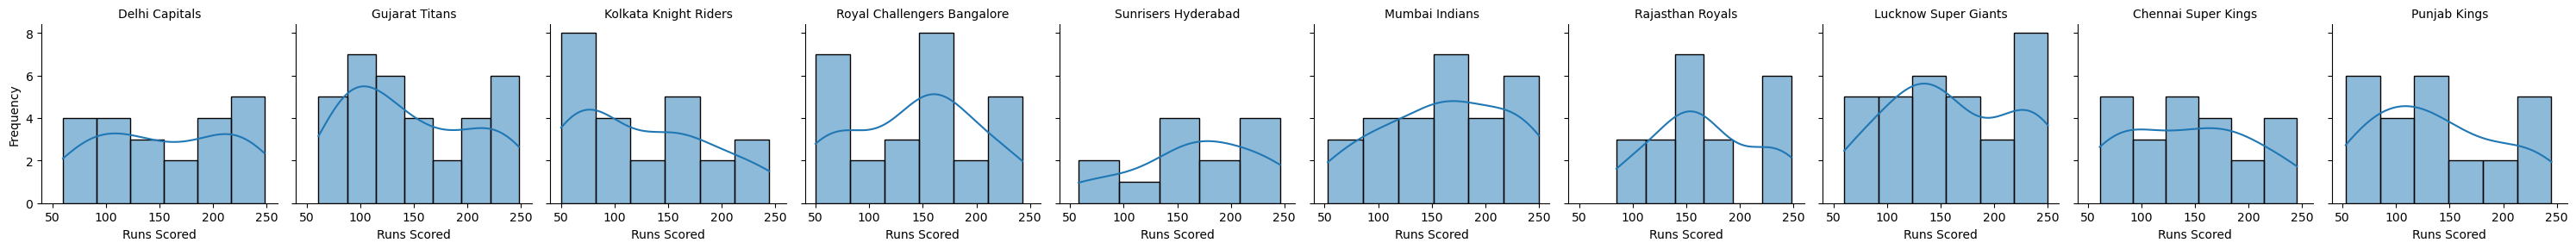

In [35]:
#FaceetGrid
plt.figure(figsize=(40,20))
g=sns.FacetGrid(data=df,col="team")
g.map(sns.histplot,"runs_scored",kde=True)
g.set_titles("{col_name}")
g.set_axis_labels("Runs Scored","Frequency")
plt.show()

#Each facet that is sub plot shows the distribution of runs scored by specific team. You can idedntify teams with higher scoring rANGE OT 
#more consistant performance by analying the shape and spread of the histogram.

In [36]:
from mpl_toolkits.mplot3d import Axes3D

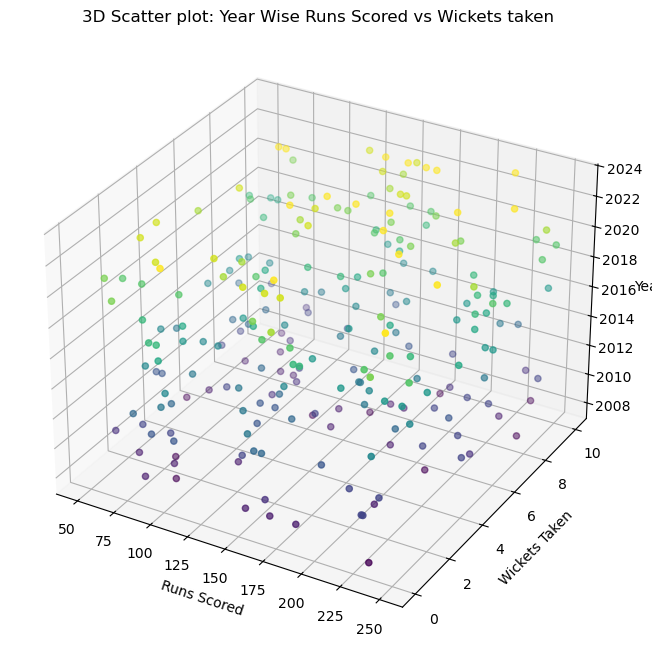

In [39]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(projection="3d")
scatter=ax.scatter(
    df["runs_scored"],
    df["wickets_taken"],
    df["year"],
    c=df["year"]
)

ax.set_xlabel("Runs Scored")
ax.set_ylabel("Wickets Taken")
ax.set_zlabel("Year")
ax.set_title("3D Scatter plot: Year Wise Runs Scored vs Wickets taken")
plt.show()

# 
#
#